In [0]:
#If you are not using Colab and read data from your Google Drive, delete this two lines
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import numpy as np
import cv2

from sklearn import neighbors

#k for K-Nearest-Neighbour
n_neighbors = 14

#The size all image will be resized to
tiny_size = 16

#The directory where training and testing directory were set.
#If data was set in current directory, change it to empty string
directory = "/content/drive/My Drive/"

training_directory = directory + 'training/'
test_directory = directory + 'testing/'

In [0]:
training_images = []
training_classes = []

validation_images = []
validation_classes = []

val_ratio = 20
#Load all the training image, and their corresponding class index, it may takes couple of minutes
#Divide it into training and validation data set
for index in range(len(labels)):
  count = 0
  for name in os.listdir(training_directory+labels[index]):
    if count >= 20:
      training_images.append(np.concatenate(cv2.resize(cv2.imread(training_directory+labels[index]+"/"+name, cv2.IMREAD_GRAYSCALE), (tiny_size, tiny_size))))
      training_classes.append(index)
    else:
      validation_images.append(np.concatenate(cv2.resize(cv2.imread(training_directory+labels[index]+"/"+name, cv2.IMREAD_GRAYSCALE), (tiny_size, tiny_size))))
      validation_classes.append(index)
      count = count + 1


In [60]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')


#Train the classifier
clf.fit(np.asarray(training_images), np.asarray(training_classes))

print(clf.score(np.asarray(validation_images), np.asarray(validation_classes)))

0.20333333333333334


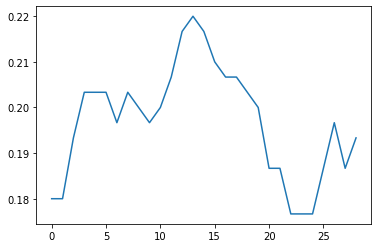

In [61]:
import matplotlib.pyplot as plt

acc = []

#Plot the different validation accuracy with different k
for k in range(1, 30):
  clf = neighbors.KNeighborsClassifier(k, weights='distance')
  acc.append(clf.fit(np.asarray(training_images), np.asarray(training_classes)).score(np.asarray(validation_images), np.asarray(validation_classes)))

plt.plot(acc)

In [0]:
training_images = []
training_classes = []

#All image are set to train
#Load all the training image, and their corresponding class index, it may takes couple of minutes
for index in range(len(labels)):
  for name in os.listdir(training_directory+labels[index]):
    training_images.append(np.concatenate(cv2.resize(cv2.imread(training_directory+labels[index]+"/"+name, cv2.IMREAD_GRAYSCALE), (tiny_size, tiny_size))))
    training_classes.append(index)

In [64]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')

#Train the classifier
clf.fit(np.asarray(training_images), np.asarray(training_classes))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='distance')

In [0]:
f = open("run1.txt", "w+")

#Used trained classifier to predict the class of images in testset and write it into text file
#This takes longer time than loading training image, about 5-10 minutes
for name in os.listdir(test_directory):
  predicted_class = clf.predict(np.concatenate(cv2.resize(cv2.imread(test_directory+name, cv2.IMREAD_GRAYSCALE), (tiny_size, tiny_size))).reshape((1, tiny_size*tiny_size)))
  f.write(name+" "+labels[int(predicted_class[0])]+"\n")

f.close()